In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import censusdata



In [ ]:
censusdata.search('acs1', 2019, 'concept', 'OCCUPANCY STATUS')

In [2]:
def extract_tractce(x):
    return str(x).split(",")[-1].split("> ")[2].split(":")[1]

def extract_blkgrpce(x):
    return str(x).split(",")[-1].split("> ")[3].split(":")[1]

def download_census_data(county):
    df = censusdata.download('acs5', 2019, censusdata.censusgeo([('state', '36'), ('county', str(county)),('block group','*')]), 
                                    ['B28010_001E', 'B28010_002E', 
                                        'B28011_001E', 'B28011_002E',
                                        'B25002_001E', 'B25002_002E',
                                        'B25044_001E', 'B25044_003E', 'B25044_010E',
                                        # 'B14001_001E', 'B14001_002E',  # no data
                                        # 'C18108_001E', 'C18108_005E', 'C18108_009E', 'C18108_013E',  # no data
                                        'B23025_001E', 'B23025_002E',
                                        # 'B27001_001E', 'B27001_004E', 'B27001_007E', 'B27001_010E', 'B27001_013E', 'B27001_016E', 'B27001_019E', 'B27001_022E', 'B27001_025E', 'B27001_028E', 'B27001_032E', 'B27001_035E', 'B27001_038E', 'B27001_041E', 'B27001_044E', 'B27001_047E', 'B27001_050E', 'B27001_053E', 'B27001_056E',  # no data
                                        'B01001_001E', 'B01001_003E', 'B01001_004E', 'B01001_005E', 'B01001_006E', 'B01001_027E', 'B01001_028E', 'B01001_029E', 'B01001_030E', 'B01001_020E', 'B01001_021E', 'B01001_022E', 'B01001_023E', 'B01001_024E', 'B01001_025E', 'B01001_044E', 'B01001_045E', 'B01001_046E', 'B01001_047E', 'B01001_048E', 'B01001_049E',
                                        'B08137_001E', 'B08137_004E', 'B08137_007E', 'B08137_010E', 'B08137_013E', 'B08137_019E'
                                        ])
    df['own_computer_rate'] = df['B28010_002E']/df['B28010_001E']
    df['internet_subscription_rate'] = df['B28011_002E']/df['B28011_001E']
    df['occupied_rate'] = df['B25002_002E']/df['B25002_001E']
    df['no_vehicle_rate'] = (df['B25044_003E'] + df['B25044_010E']) / df['B25044_001E']
    # df['school_enrollment_rate'] = df['B14001_002E']/df['B14001_001E']
    # df['disabled_rate'] = 1 - (df['C18108_005E'] + df['C18108_009E'] + df['C18108_013E']) / df['C18108_001E']
    df['in_labor_force_rate'] = df['B23025_002E']/df['B23025_001E']
    # df['with_health_insurance_rate'] = (df['B27001_004E'] + df['B27001_007E'] + df['B27001_010E'] + df['B27001_013E'] + df['B27001_016E'] + df['B27001_019E'] + df['B27001_022E'] + df['B27001_025E'] + df['B27001_028E'] + df['B27001_032E'] + df['B27001_035E'] + df['B27001_038E'] + df['B27001_041E'] + df['B27001_044E'] + df['B27001_047E'] + df['B27001_050E'] + df['B27001_053E'] + df['B27001_056E']) / df['B27001_001E']
    df['aged_18_or_less_rate'] = (df['B01001_003E'] + df['B01001_004E'] + df['B01001_005E'] + df['B01001_006E'] + df['B01001_027E'] + df['B01001_028E'] + df['B01001_029E'] + df['B01001_030E']) / df['B01001_001E']
    df['aged_65_or_above_rate'] = (df['B01001_020E'] + df['B01001_021E'] + df['B01001_022E'] + df['B01001_023E'] + df['B01001_024E'] + df['B01001_025E'] + df['B01001_044E'] + df['B01001_045E'] + df['B01001_046E'] + df['B01001_047E'] + df['B01001_048E'] + df['B01001_049E']) / df['B01001_001E']
    # df['drive_alone_rate'] = df['B08137_004E']/df['B08137_001E']
    # df['carpool_rate'] = df['B08137_007E']/df['B08137_001E']
    # df['public_transport_rate'] = df['B08137_010E']/df['B08137_001E']
    # df['walk_rate'] = df['B08137_013E']/df['B08137_001E']
    # df['work_at_home_rate'] = df['B08137_019E']/df['B08137_001E']

    # df = df[['own_computer_rate', 'internet_subscription_rate', 'occupied_rate', 'no_vehicle_rate', 'in_labor_force_rate', 'aged_18_or_less_rate', 'aged_65_or_above_rate', 'drive_alone_rate', 'carpool_rate', 'public_transport_rate', 'walk_rate', 'work_at_home_rate']]
    df = df[['own_computer_rate', 'internet_subscription_rate', 'occupied_rate', 'no_vehicle_rate', 'in_labor_force_rate', 'aged_18_or_less_rate', 'aged_65_or_above_rate']]

    # 应用函数到索引，并创建新的列
    df['TRACTCE'] = df.index.map(extract_tractce)
    df['BLKGRPCE'] = df.index.map(extract_blkgrpce)

    return df

In [3]:
manhattan = download_census_data('061')
bronx = download_census_data('005')
brooklyn = download_census_data('047')
queens = download_census_data('081')
staten_island = download_census_data('085')

# fill in missing values with average of column
manhattan = manhattan.fillna(manhattan.mean())
bronx = bronx.fillna(bronx.mean())
brooklyn = brooklyn.fillna(brooklyn.mean())
queens = queens.fillna(queens.mean())
staten_island = staten_island.fillna(staten_island.mean())


# merge above dataframes into newyork by TRACTCE and BLKGRPCE
newyork_data = pd.concat([manhattan, bronx, brooklyn, queens, staten_island], axis=0)
newyork_data = newyork_data.reset_index(drop=True)

# Get the goedata for block groups in New York City

newyork = gpd.read_file('../data/other/ACS2019/tl_2019_36_bg/tl_2019_36_bg.shp')
newyork = newyork.to_crs(epsg=4326)

# select only the census tracts in ['005', '047', '061', '081', '085']
newyork = newyork[newyork['COUNTYFP'].isin(['005', '047', '061', '081', '085'])]

newyork = pd.merge(newyork, newyork_data, on=['TRACTCE', 'BLKGRPCE'], how='left')

newyork.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,own_computer_rate,internet_subscription_rate,occupied_rate,no_vehicle_rate,in_labor_force_rate,aged_18_or_less_rate,aged_65_or_above_rate
0,36,081,025900,2,360810259002,Block Group 2,G5030,S,64620,0,+40.7464004,-073.9045386,"POLYGON ((-73.90642 40.74564, -73.90535 40.747...",0.929825,0.880702,0.866261,0.715789,0.808050,0.174617,0.098807
1,36,081,025900,2,360810259002,Block Group 2,G5030,S,64620,0,+40.7464004,-073.9045386,"POLYGON ((-73.90642 40.74564, -73.90535 40.747...",0.788204,0.766756,0.939547,0.407507,0.579657,0.157729,0.211356
2,36,081,016600,2,360810166002,Block Group 2,G5030,S,91377,0,+40.6783653,-073.8192669,"POLYGON ((-73.82136 40.68050, -73.82044 40.680...",0.920826,0.848537,0.979764,0.800344,0.581602,0.246784,0.052632
3,36,081,016600,2,360810166002,Block Group 2,G5030,S,91377,0,+40.6783653,-073.8192669,"POLYGON ((-73.82136 40.68050, -73.82044 40.680...",0.860000,0.720000,0.827815,0.224000,0.694737,0.255116,0.111869
4,36,081,016600,2,360810166002,Block Group 2,G5030,S,91377,0,+40.6783653,-073.8192669,"POLYGON ((-73.82136 40.68050, -73.82044 40.680...",0.803390,0.803390,0.840456,0.091525,0.629283,0.164439,0.220588


<Axes: >

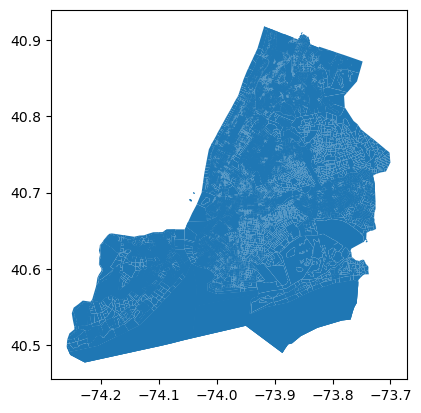

In [4]:
newyork.describe()

#plot newyork in a map
newyork.plot()


<Axes: >

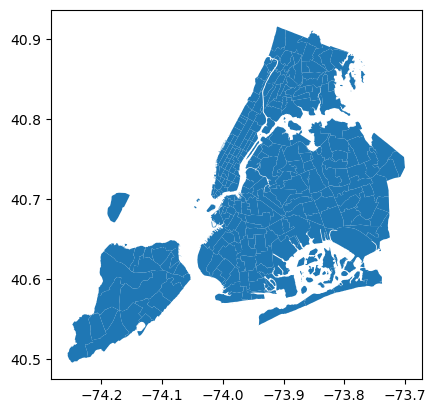

In [2]:
nyc_taxi_zones = gpd.read_file('../data/other/taxi_zones/taxi_zones.shp')
nyc_taxi_zones = nyc_taxi_zones.to_crs(epsg=4326)

nyc_taxi_zones.plot()

In [6]:
blkgp_in_taxizone = gpd.sjoin(newyork, nyc_taxi_zones, how="right", op='intersects')
taxizone_with_acs = blkgp_in_taxizone.dissolve(by='LocationID', aggfunc='mean')

/opt/homebrew/Caskroom/miniconda/base/envs/dissertation/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/p7/3vzsfzqd7xg1gkp_lyrvwhhw0000gn/T/ipykernel_78390/2770896478.py:2: FutureWarning: The default value of numeric_only in aggfunc='mean' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  taxizone_with_acs = blkgp_in_taxizone.dissolve(by='LocationID', aggfunc='mean')


In [7]:
taxizone_with_acs.describe()


,index_left,ALAND,AWATER,own_computer_rate,internet_subscription_rate,occupied_rate,no_vehicle_rate,in_labor_force_rate,aged_18_or_less_rate,aged_65_or_above_rate,OBJECTID,Shape_Leng,Shape_Area
count,259.000000,2.590000e+02,2.590000e+02,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,260.000000,260.000000,260.000000
mean,5850.078259,2.751147e+05,9.653796e+04,0.896088,0.823556,0.905016,0.508498,0.640314,0.193998,0.148739,132.504015,0.094927,0.000405
std,1908.918471,4.945919e+05,5.466074e+05,0.029505,0.043583,0.031831,0.158393,0.039415,0.031221,0.033007,76.320933,0.054457,0.000484
min,1562.507812,2.389126e+04,0.000000e+00,0.679144,0.535432,0.758723,0.089165,0.514207,0.114766,0.081083,1.000000,0.024696,0.000027
25%,4402.695037,8.275463e+04,0.000000e+00,0.884849,0.800905,0.887054,0.393326,0.612822,0.172598,0.126388,66.750000,0.054766,0.000138
50%,5835.941176,1.426803e+05,7.216066e+03,0.899003,0.826518,0.913143,0.555519,0.638934,0.195108,0.142764,133.500000,0.085545,0.000269
75%,7492.333375,2.349111e+05,3.341975e+04,0.914480,0.853262,0.927762,0.638042,0.670715,0.213611,0.165521,198.250000,0.120322,0.000489
max,10405.375000,4.879175e+06,6.246207e+06,0.960482,0.911329,0.966335,0.750242,0.734605,0.359172,0.288825,263.000000,0.433470,0.004866


In [8]:
taxizone_with_acs.to_file("../data/other/ACS2019/processed/taxizone_with_acs.shp")

/var/folders/p7/3vzsfzqd7xg1gkp_lyrvwhhw0000gn/T/ipykernel_78390/476986741.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  taxizone_with_acs.to_file("../data/other/ACS2019/processed/taxizone_with_acs.shp")


In [2]:
# Read in the data with geopandas
pluto = gpd.read_file('../data/other/PLUTO/MapPLUTO.shp')
pluto.head()

,Borough,Block,Lot,CD,BCT2020,BCTCB2020,CT2010,CB2010,SchoolDist,Council,...,FIRM07_FLA,PFIRM15_FL,Version,DCPEdited,Latitude,Longitude,Notes,Shape_Leng,Shape_Area,geometry
0,MN,1,111,101,1000500,10005001003,5,1000,02,1,...,1,1,23v1.2,NaN,40.692922,-74.017637,NaN,0.0,6.445095e+04,"POLYGON ((979185.332 191646.482, 979184.678 19..."
1,MN,1,112,101,1000500,10005001003,5,1000,02,1,...,1,1,23v1.2,NaN,40.692927,-74.018348,NaN,0.0,7.225247e+03,"POLYGON ((979185.332 191646.482, 979141.322 19..."
2,MN,1,201,101,1000100,10001001000,1,1000,02,0,...,NaN,1,23v1.2,NaN,40.698188,-74.041329,NaN,0.0,1.148539e+06,"POLYGON ((973648.066 193711.894, 973525.342 19..."
3,MN,2,1,101,1000900,10009001022,9,1025,02,1,...,1,1,23v1.2,t,40.700369,-74.012911,NaN,0.0,1.008250e+05,"POLYGON ((980609.551 194220.421, 980608.726 19..."
4,MN,2,23,101,1000900,10009001022,9,1025,02,1,...,1,1,23v1.2,t,40.701171,-74.009243,NaN,0.0,9.690237e+04,"MULTIPOLYGON (((981181.714 194852.820, 981327...."


In [20]:
# keep the geometry of the pluto data
pluto1 = pluto[['geometry']].copy()
# keep the geometry of the census tr
# add features to pluto1

pluto1['res_rate'] = pluto['ResArea'] / pluto['LotArea']
pluto1['office_rate'] = pluto['OfficeArea'] / pluto['LotArea']
pluto1['retail_rate'] = pluto['RetailArea'] / pluto['LotArea']
pluto1['garage_rate'] = pluto['GarageArea'] / pluto['LotArea']
pluto1['strge_rate'] = pluto['StrgeArea'] / pluto['LotArea']
pluto1['other_com_rate'] = (pluto['ComArea']-pluto['ResArea']-pluto['OfficeArea']-pluto['RetailArea']) / pluto['LotArea']

pluto1.head()


,geometry,res_rate,office_rate,retail_rate,garage_rate,strge_rate,other_com_rate
0,"POLYGON ((979185.332 191646.482, 979184.678 19...",0.0,0.0,0.022033,0.0,0.0,0.716214
1,"POLYGON ((979185.332 191646.482, 979141.322 19...",0.0,0.0,0.000000,0.0,0.0,1.169020
2,"POLYGON ((973648.066 193711.894, 973525.342 19...",0.0,0.0,0.000000,0.0,0.0,0.218194
3,"POLYGON ((980609.551 194220.421, 980608.726 19...",0.0,0.0,0.000000,0.0,0.0,1.338336
4,"MULTIPOLYGON (((981181.714 194852.820, 981327....",0.0,0.0,0.000000,0.0,0.0,0.047735


In [12]:
pluto1 = pluto1.to_crs(epsg=4326)
pluto_in_taxizone = gpd.sjoin(pluto1, nyc_taxi_zones, how="right", op='intersects')
taxizone_with_pluto = pluto_in_taxizone.dissolve(by='LocationID', aggfunc='mean')

/opt/homebrew/Caskroom/miniconda/base/envs/dissertation/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/p7/3vzsfzqd7xg1gkp_lyrvwhhw0000gn/T/ipykernel_74141/946386117.py:3: FutureWarning: The default value of numeric_only in aggfunc='mean' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  taxizone_with_pluto = pluto_in_taxizone.dissolve(by='LocationID', aggfunc='mean')


In [21]:
# 查看Location_ID去重后的数量
taxizone_with_pluto['LocationID'] = taxizone_with_pluto['OBJECTID'].astype('int')




In [27]:

taxizone_with_pluto = taxizone_with_pluto.dropna()
taxizone_with_pluto = taxizone_with_pluto.drop(columns=['LocationID'])
# save to shapefile
taxizone_with_pluto.to_file("../data/other/PLUTO/processed/taxizone_with_pluto.shp")

/var/folders/p7/3vzsfzqd7xg1gkp_lyrvwhhw0000gn/T/ipykernel_74141/4070886187.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  taxizone_with_pluto.to_file("../data/other/PLUTO/processed/taxizone_with_pluto.shp")


In [3]:
q3df = pd.read_csv('../data/count/q3/q3.csv')
q3df.head()

,locationid,trip_rate,daily_trip_count,avg_trip_mile
0,1,0.000805,20.960674,19.402527
1,2,1.529412,0.966292,10.323913
2,3,1.002023,1350.803371,4.322777
3,4,0.680226,2782.595506,4.083134
4,5,1.073598,157.651685,6.456553


In [6]:
nyc_taxi_zones = pd.merge(nyc_taxi_zones, q3df, left_on='LocationID',right_on='locationid', how='left')

In [8]:
nyc_taxi_zones.describe()
nyc_taxi_zones.to_file("../data/count/q3/processed/nyc_taxi_zones.shp")

/var/folders/p7/3vzsfzqd7xg1gkp_lyrvwhhw0000gn/T/ipykernel_17670/3064907405.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nyc_taxi_zones.to_file("../data/count/q3/processed/nyc_taxi_zones.shp")
